In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
T = 2
N = 24
num = 10000
r = 0.1
dt = T/N

In [3]:
def gen_stockprices(a,b,sigma,S0):
    S1 = a*(b - S0)*dt + sigma*np.sqrt(S0)*np.random.normal(loc=0,scale=np.sqrt(dt))
    return S1

In [6]:
prices = np.zeros((num,N+1))
S0 = 30
Sb = 60
K = 70
payoff = np.zeros((num,))
for i in range(num):
    prices[i][0] = S0
    knocked_up = False
    for j in range(1,N+1):
        prices[i][j] = prices[i][j-1] + gen_stockprices(a=1,b=70,sigma=0.25,S0=prices[i][j-1])
        if prices[i][j] > Sb:
            payoff[i] = 0
            knocked_up = True
    if knocked_up is False:  
        payoff[i] = max(0, K - prices[i][N])
option_price = np.average(payoff)*np.exp(-.2)
print(option_price)

0.0008528351712818956


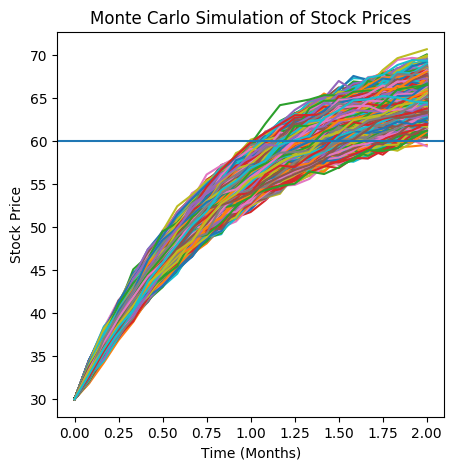

In [9]:
t = np.linspace(0,T,N+1)
plt.figure(figsize=(5,5))
for i in range(num):
    plt.plot(t,prices[i])
plt.axhline(y = 60)
# for i in range(num):
#     plt.plot(t,payoff[i])
# for i in range(num):
#     plt.plot(t, Sb)
plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Time (Months)')
plt.ylabel('Stock Price')
plt.show()